In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

from pathlib import Path

data_dir = Path('.').resolve() / 'data'
waveform = np.load(data_dir / 'waveform_transport.npy')


In [3]:
from pytrans.analysis.simulate1d import simulate_waveform_1d
from pytrans.analysis.simulate import simulate_waveform

In [4]:
trap = SurfaceTrap()

In [5]:
import json

with open(data_dir / 'analysis_transport.json', 'r') as fp:
    rj = json.load(fp)[0]


In [6]:
x_eq = np.asarray(rj['mode_solver_results']['x_eq'])
x1 = x_eq[:, 0]

In [7]:
t = np.linspace(0, 25e-6, 400)
# t = np.linspace(0, 300e-6, 2000)
wf = waveform
trap.ion = Ca40

# t = np.linspace(0, 5e-6, 100)
# wf = [waveform[0]]
x0 = x1
# x2 = trap.x_ele(2)
# x0 = [x2 - 2e-6, x2 + 2e-6]
sim = simulate_waveform_1d(trap, wf, t, x0, slowdown=1)

2
Exec simulate_waveform_1d


100%|██████████| 1000/1000 [00:08<00:00, 113.06%/s]


- simulate_waveform_1d elapsed time: 8854.102 ms


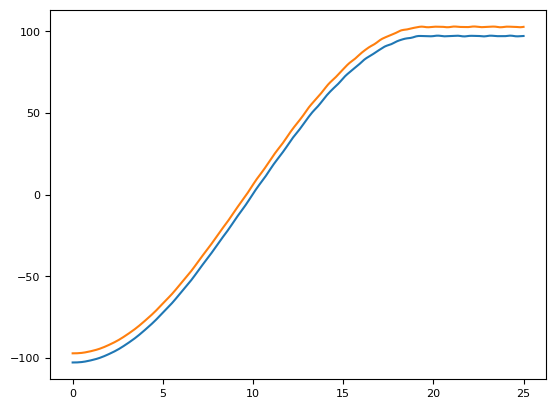

In [8]:
plt.plot(sim.t * 1e6, sim.y[:len(x0)].T *1e6)

In [9]:
ions = [Ca40, Ca40]

# x2 = trap.x_ele(2)
# x2 = [x2 - 2e-6, x2 + 2e-6]
x0 = x_eq.copy()
# x0[:, 0] = [x2 - 2e-6, x2 + 2e-6]
v0 = np.zeros_like(x0)
v0[:, 0] = np.random.rand(2) * 20

x0, v0


(array([[-1.02811216e-04,  3.53630065e-09,  6.70835176e-05],
        [-9.72049836e-05, -2.49888939e-09,  6.70786837e-05]]),
 array([[16.96137611,  0.        ,  0.        ],
        [10.03463507,  0.        ,  0.        ]]))

In [10]:

bounds = [(-120e-6, 1200e-6), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]
# bounds = None

sim3d = simulate_waveform(trap, wf, ions, t, dt=trap.dt, x0=x0, v0=v0, bounds=bounds)


Exec simulate_waveform


  0%|          | 0/100 [00:00<?, ?%/s]

 99%|█████████▉| 99/100 [01:29<00:00,  1.10%/s]


- simulate_waveform elapsed time: 89922.479 ms
The solver successfully reached the end of the integration interval.


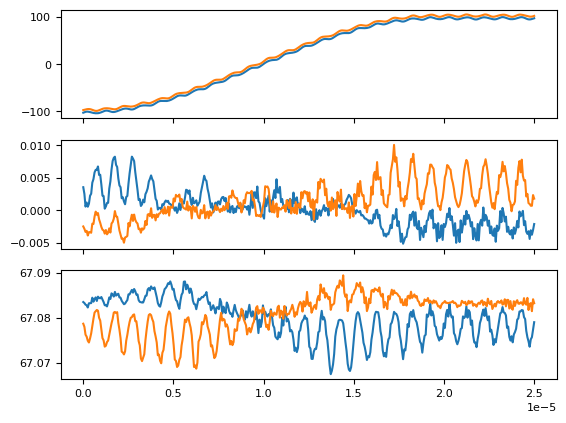

In [11]:
fig, axes = plt.subplots(3, 1, sharex=True)

for j in range(3):
    ax = axes[j]
    ax.plot(sim3d.t, sim3d.x[:, :, j] * 1e6)


In [12]:
sim_results = {
    't': sim3d.t.tolist(),
    'x': sim3d.x.tolist(),
    'v': sim3d.v.tolist()
}

with open(data_dir / 'simulation_transport.json', 'w') as fp:
    json.dump(sim_results, fp, indent=2)

In [13]:
sim3d.v[-1]

array([[ 1.20305886e+01, -1.11560197e-02,  4.26024025e-03],
       [ 1.59747456e+01,  1.54157110e-02, -3.46363785e-02]])

In [14]:
sim3d.t_out, sim3d.x_out

(None, None)

In [15]:
sim3d.message


'The solver successfully reached the end of the integration interval.'

In [16]:
sim3d.t_events

[array([], dtype=float64)]

In [17]:
sim3d.y.shape

(12, 400)

In [18]:
import json


In [19]:
y = sim3d.y[:, 0]
y.shape

N, d = 2, 3
x = y[:N * d]

In [20]:
bounds = [(-200e-6, 0), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

In [21]:
_x0 = 1e-6
b0 = np.tile([b[0] / _x0 for b in bounds], N)
b1 = np.tile([b[1] / _x0 for b in bounds], N)

def term(x):
    return 1 if np.all(np.bitwise_and(x >= b0, x <= b1)) else -1
